In [1]:
import pandas as pd 
import re
import json 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [2]:
with open('no_numbers.txt', 'r') as filehandle: 
    tweets=json.load(filehandle)

In [3]:
len(tweets)

209141

In [4]:
tweets=[tweet.lower() for tweet in tweets]

##### Get rid of stop words that were not removed by tfidf 

In [5]:
tweets=[tweet.replace(" im ", "") for tweet in tweets]

In [6]:
tweets=[tweet.replace("thats", "") for tweet in tweets]

In [7]:
tweets=[tweet.replace("theres", "") for tweet in tweets]

In [8]:
tweets=[tweet.replace("dont", "") for tweet in tweets]

In [9]:
tweets=[tweet.replace(" id ", "") for tweet in tweets]

In [10]:
tweets=[tweet.replace("youd", "") for tweet in tweets]

In [11]:
tweets=[tweet.replace("didnt", "") for tweet in tweets]

In [12]:
tweets=[tweet.replace("theyre", "") for tweet in tweets]

In [13]:
tweets=[tweet.replace(" amp ", "") for tweet in tweets]

In [14]:
tweets=[tweet.replace("doesnt", "") for tweet in tweets]

In [15]:
tweets=[tweet.replace(" isnt ", "") for tweet in tweets]

In [16]:
tweets=[tweet.replace(" youre ", "") for tweet in tweets]

In [17]:
tweets=[tweet.replace(" ill ", "") for tweet in tweets]

###### Remove commonly used words that aren't providing meaning for us 

In [18]:
tweets=[tweet.replace(" just ", "") for tweet in tweets]

In [19]:
tweets=[tweet.replace(" really ", "") for tweet in tweets]

In [20]:
tweets=[tweet.replace(" does ", "") for tweet in tweets]

In [21]:
tweets=[tweet.replace(" lot ", "") for tweet in tweets]

In [22]:
tweets=[tweet.replace(" did ", "") for tweet in tweets]

In [23]:
tweets=[tweet.replace(" like ", "") for tweet in tweets]

In [24]:
tweets=[tweet.replace(" way ", "") for tweet in tweets]

In [25]:
tweets=[tweet.replace(" going ", "") for tweet in tweets]

In [26]:
tweets=[tweet.replace(" make ", "") for tweet in tweets]

In [27]:
tweets=[tweet.replace(" say ", "") for tweet in tweets]

In [28]:
tweets=[tweet.replace(" better ", "") for tweet in tweets]

In [37]:
tweets=[tweet.replace(" people ", "") for tweet in tweets]

In [38]:
tweets=[tweet.replace(" think ", "") for tweet in tweets]

In [39]:
tweets=[tweet.replace(" know ", "") for tweet in tweets]

In [40]:
tweets=[tweet.replace(" time ", "") for tweet in tweets]

In [41]:
tweets=[tweet.replace(" need ", "") for tweet in tweets]

In [42]:
tweets=[tweet.replace(" right ", "") for tweet in tweets]

In [43]:
tweets=[tweet.replace(" yes ", "") for tweet in tweets]

In [44]:
tweets=[tweet.replace(" want ", "") for tweet in tweets]

In [45]:
with open('tweets_no_freq_words.txt', 'w') as filehandle: 
    json.dump(tweets, filehandle)

In [46]:
tweets

['wootenomics and i were thinking about roses today checkout his newsletter and subscribe',
 'personal finance advice happy day after valentinesday where roses are as pretty but cheaper  relationship advice  listen to the above advice',
 'econwithdustin theecongames soundsthey are enjoying it',
 'dganstinei do  miles between cincinnati and lexingtona big difference cant imagine how much of a difference it would be to move closer to the lakes',
 'dganstine this sounds amazing i love winter weather',
 'mohammedalrahbi shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk itcreates a high barrier to entry because you have to prove that you will not fail what i called paternal government policies in my last discussion',
 'mohammedalrahbi shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk the bureaucracy is a function of culture not the otheraround the conversation around taking risk is controlled by parents fear of their kids failing  thes

In [79]:
words = word_tokenize(tweets[5])
words

['mohammedalrahbi',
 'shathamaskiry',
 'nasralbusaidi',
 'jeni_houser',
 'dmpender',
 'jstorres',
 'drnickombe',
 'elonmusk',
 'itcreates',
 'a',
 'high',
 'barrier',
 'to',
 'entry',
 'because',
 'you',
 'have',
 'to',
 'prove',
 'that',
 'you',
 'will',
 'not',
 'fail',
 'what',
 'i',
 'called',
 'paternal',
 'government',
 'policies',
 'in',
 'my',
 'last',
 'discussion']

In [47]:
cv_tfidf = TfidfVectorizer(stop_words='english')

In [48]:
X_tfidf = cv_tfidf.fit_transform(tweets)

In [49]:
doc_term=pd.DataFrame(X_tfidf.toarray(), index=tweets, columns=cv_tfidf.get_feature_names())

In [50]:
doc_term.head()

,__,___,_____,______,_______,__________,___________,___init____,___lucky_luc___,___tchoungui,...,zynks,zyort,zz,zzbar,zzeker,zzszcn,zzszcnsome,zzzecon,zzzs,zzzzzz
wootenomics and i were thinking about roses today checkout his newsletter and subscribe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
personal finance advice happy day after valentinesday where roses are as pretty but cheaper relationship advice listen to the above advice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
econwithdustin theecongames soundsthey are enjoying it,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dganstinei do miles between cincinnati and lexingtona big difference cant imagine how much of a difference it would be to move closer to the lakes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dganstine this sounds amazing i love winter weather,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#vectorizer = CountVectorizer(stop_words='english')
#doc_word = vectorizer.fit_transform(tweets)
#doc_word.shape

In [40]:
#vectorizer.get_feature_names()[-2000]

In [42]:
#doc_term=pd.DataFrame(doc_word.toarray(), index=tweets, columns=vectorizer.get_feature_names())
#doc_term.head(10)

,__,___,_____,______,_______,__________,___________,___init____,___lucky_luc___,___tchoungui,...,zylbyaedith,zynks,zyort,zz,zzbar,zzeker,zzszcn,zzzecon,zzzs,zzzzzz
wootenomics and i were thinking about roses today checkout his newsletter and subscribe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
personal finance advice happy day after valentinesday where roses are as pretty but cheaper relationship advice listen to the above advice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
econwithdustin theecongames sounds like they are enjoying it,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dganstine yes i do miles between cincinnati and lexington make a big difference cant imagine how much of a difference it would be to move closer to the lakes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dganstine this sounds amazing i love winter weather,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mohammedalrahbi shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk it just creates a high barrier to entry because you have to prove that you will not fail what i called paternal government policies in my last discussion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mohammedalrahbi shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk the bureaucracy is a function of culture not the other way around the conversation around taking risk is controlled by parents fear of their kids failing these parents are also the ones making policies our business policies are designed to protect firms from failing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk i have heard jeni_houser in her workshops for entrepreneurs call it falling in love with the problem before finding solutions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nasralbusaidi jeni_houser dmpender jstorres drnickombe shathamaskiry elonmusk i would definitely use the word willingness to fail innovation is driven by a desire to try and learn if your ideas improve the outcome this means having an appetite for failure it is one reason why innovation is low in our region failure is not accepted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
causalinf i have benefited from online seminars and workshops not all universities have a seminar series online conferences have also reduced cost of presenting work i recognize the decrease in community but also see the benefits,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(X_tfidf)
lsa.explained_variance_ratio_

array([0.00096583, 0.00147702, 0.00137562, 0.00131988])

In [52]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2", "component_3", "component_4"],
             columns = cv_tfidf.get_feature_names())
topic_word

,__,___,_____,______,_______,__________,___________,___init____,___lucky_luc___,___tchoungui,...,zynks,zyort,zz,zzbar,zzeker,zzszcn,zzszcnsome,zzzecon,zzzs,zzzzzz
component_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_2,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
component_3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
component_4,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0


In [53]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [54]:
display_topics(lsa, cv_tfidf.get_feature_names(), 15)


Topic  0
good, new, covid, great, news, work, paper, year, data, policy, thanks, thread, read, day, vaccine

Topic  1
good, thread, thanks, point, luck, andrew___baker, morning, idea, bad, thing, pretty, question, night, love, causalinf

Topic  2
news, new, times, art, great, newspaper, financial, yorker, photography, york, scientist, best, happy, arts, year

Topic  3
great, thanks, thread, paper, interesting, thank, work, read, congratulations, research, sharing, newtonnotes, love, nice, reading


In [ ]:
#vectorizer = CountVectorizer(stop_words = 'english')
#doc_word = vectorizer.fit_transform(tweets)
#pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).head(10)

In [55]:
nmf_model = NMF(4)
topic_matrix = nmf_model.fit_transform(X_tfidf)



In [56]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3", "component_4"],
             columns = cv_tfidf.get_feature_names())
topic_word




,__,___,_____,______,_______,__________,___________,___init____,___lucky_luc___,___tchoungui,...,zynks,zyort,zz,zzbar,zzeker,zzszcn,zzszcnsome,zzzecon,zzzs,zzzzzz
component_1,0.002,0.001,0.001,0.000,0.0,0.0,0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_2,0.000,0.001,0.000,0.001,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_3,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_4,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
display_topics(nmf_model, cv_tfidf.get_feature_names(), 25)





Topic  0
covid, data, policy, work, vaccine, year, paper, day, years, deaths, pandemic, economic, public, new, economics, today, health, countries, uk, world, important, cases, point, big, market

Topic  1
good, point, luck, thread, morning, bad, thing, idea, pretty, andrew___baker, question, tweet, read, night, oh, start, job, hear, reason, things, look, news, causalinf, stuff, sounds

Topic  2
news, new, times, art, yorker, newspaper, financial, photography, york, year, best, scientist, happy, science, arts, innovation, story, economist, mashable, economy, artists, design, subscribe, read, congratulations

Topic  3
great, thanks, thread, paper, thank, work, read, interesting, congratulations, sharing, congrats, idea, opportunity, book, reading, research, nice, forward, job, looking, looks, discussion, students, wow, check


In [58]:
doc_topic.shape



(209141, 4)

In [59]:
doc_topic = pd.DataFrame(topic_matrix.round(3),
             columns = ["component_1","component_2","component_3", "component_4"])
doc_topic




,component_1,component_2,component_3,component_4
0,0.005,0.000,0.003,0.001
1,0.009,0.004,0.003,0.001
2,0.000,0.000,0.000,0.001
3,0.005,0.000,0.000,0.000
4,0.004,0.002,0.000,0.004
...,...,...,...,...
209136,0.001,0.000,0.000,0.000
209137,0.000,0.004,0.000,0.030
209138,0.000,0.000,0.000,0.000
209139,0.001,0.000,0.000,0.000


In [60]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys


In [61]:
keys=get_keys(topic_matrix)
keys
Counter(keys)



Counter({0: 167194, 3: 19569, 2: 12208, 1: 10170})

In [62]:
def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

    

In [63]:
keys_to_counts(keys)



([0, 3, 2, 1], [167194, 19569, 12208, 10170])

In [64]:
categories, counts = keys_to_counts(keys)



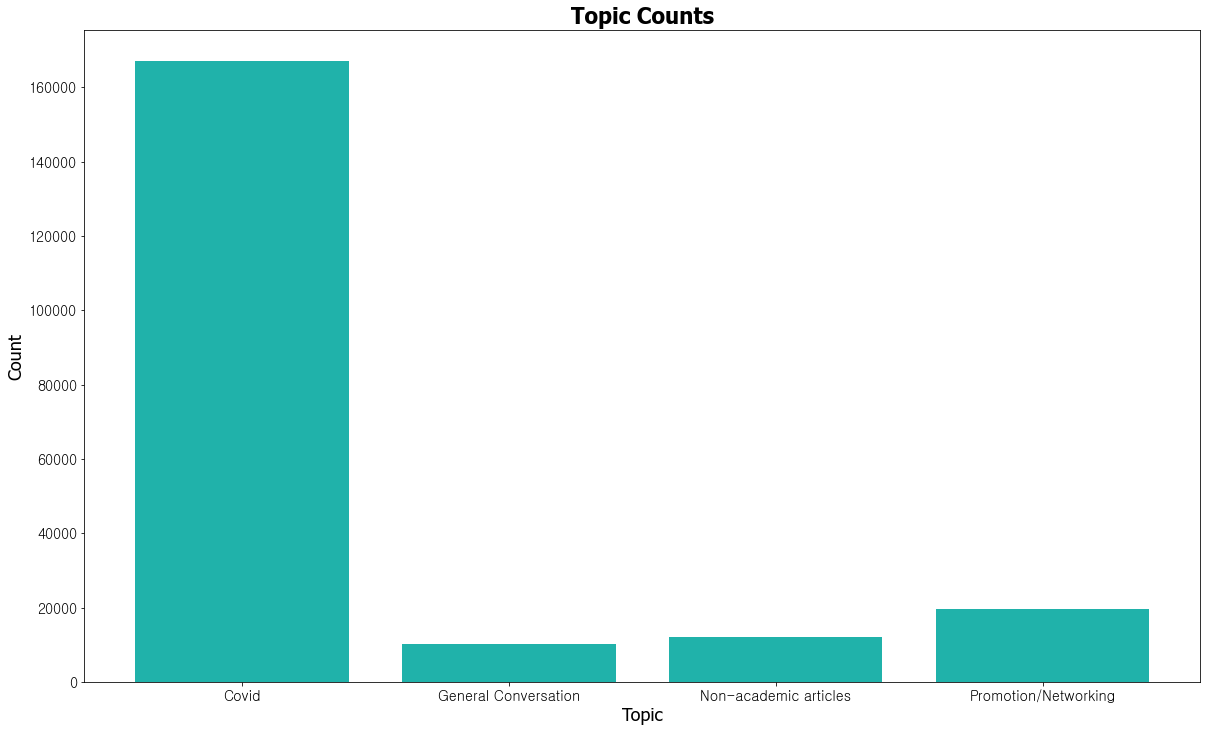

In [65]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.bar(categories,counts,color='lightseagreen');
ax.set_xticks(categories);
plt.xlabel("Topic", **tfont)
plt.ylabel("Count", **tfont)
ax.set_xticklabels(['Covid','Promotion/Networking','Non-academic articles','General Conversation',])
plt.title('Topic Counts', **tbfont)
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.savefig('topic_counts.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();



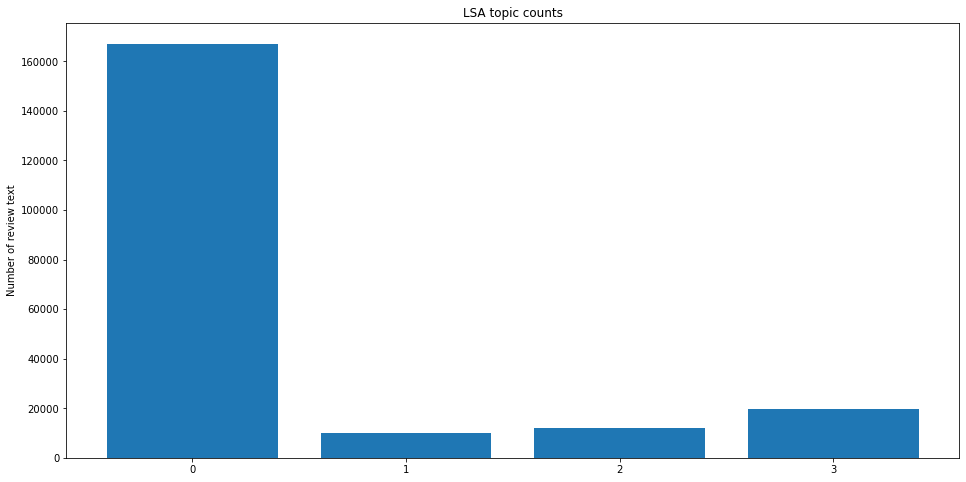

In [114]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(categories, counts);
ax.set_xticks(categories);
#ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();




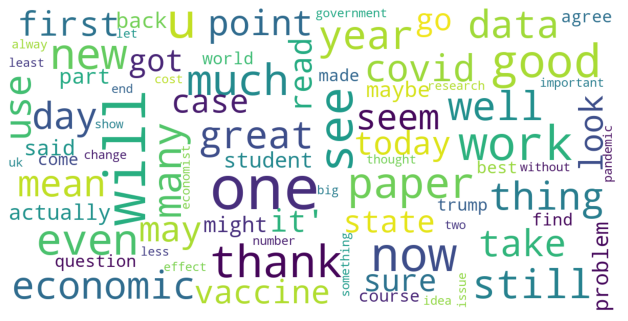

In [134]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='white', max_words=100, max_font_size=40, min_font_size=8,
                          scale=3, random_state=3).generate(str(data))

    fig = plt.figure(1, figsize=(11, 11))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    wordcloud.to_file("./WordCloud.png")
           
show_wordcloud(tweets)

In [18]:
doc_term[doc_term["amp"]==1]

,00,000,0000,00000000128,00000046,000005,0000051,00001,00005,0001,...,zylbyaedith,zynks,zyort2,zz,zzbar,zzeker,zzszcn,zzzecon,zzzs,zzzzzz
wootenomics advice for grad students teaching for the first time friday at 9am eastern on youtube here is the link set the reminder amp get notified so you can join us on chat whats your best advice for educators starting off their teaching career,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
we just finalized the econ games 2021 nku teams nkuhailecob will have 5 teams participating students are so eager to participate in this years event looking forward to working with the students amp dr kersting as coadvisor theecongames theecongames,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
i also want to continue to improve the video amp audio quality and increase engagement i hope to hit 1000 subscribers and 4000 hours of watch time by june 1 2021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5 tim cason dan friedman and ed hopkins an experimental investigation of price dispersion and cycles burdett amp judds price dispersion holds up okay in the lab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
law amp order svu got the memo that mas colell is not a book to actually open it is best used to raise monitors or fill empty space on an athletic directors shelf stolen from a friend on fb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5 tim cason dan friedman and ed hopkins an experimental investigation of price dispersion and cycles burdett amp judds price dispersion holds up okay in the lab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
law amp order svu got the memo that mas colell is not a book to actually open it is best used to raise monitors or fill empty space on an athletic directors shelf stolen from a friend on fb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
this morning on a major french radio a minister said we have doubt about az efficacy on older people and explicitly used it to escape questions about the eu amp french vaccination strategy in comparison with uk strategy no and definitely no,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
italys renzi would like execbs draghi to head italy government source article amp reuters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
doc_term[doc_term["te"]==1]